# Project: Wrangling and Analyze Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import requests
import json
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering

In [2]:
#load twitter-archive-enhanced.csv
twitter_archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#download the tweet image prediction file using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
folder_name = './'
filename = 'image_predictions.tsv'
try:
    with open(folder_name + filename, 'wb') as f:
        f.write(r.content)
except Exception as e:
    print(str(e))

In [4]:
#read the image_predictions.tsv into a dataframe
tweet_image_prediction_df = pd.read_csv('image_predictions.tsv',sep='\t')

``Note``: I have issues requesting for a Twitter developer account. Twitter is giving me an error whenever I want to create the developer account. Thus, I used the provided tweet-json.txt file

In [5]:
#parse the content of ``tweet-json.txt`` using json library, then extract the required fields and create a dataframe from them
data = []
for tweet_json in glob.glob('tweet-json.txt'):
    with open(tweet_json, encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            json_enc = json.loads(line)
            id = json_enc['id']
            is_quote_status = json_enc['is_quote_status']
            if 'retweeted_status' in json_enc:
                retweeted_status = json_enc['retweeted_status']
            else:
                retweeted_status = None
            retweet_count = json_enc['retweet_count']
            favorite_count = json_enc['favorite_count']
            statuses_count = json_enc['user']['statuses_count']
            followers_count = json_enc['user']['followers_count']
            dic = {'tweet_id':id,'is_quote_status':is_quote_status,'retweeted_status':retweeted_status,'retweet_count':retweet_count,'favorite_count':favorite_count,'statuses_count':statuses_count,'followers_count':followers_count}
            data.append(dic)
tweet_add_df = pd.DataFrame(data)

## Assessing Data



### Visual Assessments

#### Twitter archive enhanced dataframe

In [6]:
#show Twitter archive ehnanced dataframe columns and rows
twitter_archive_enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Tweet image prediction dataframe

In [7]:
#show tweet prediction dataframe columns and rows
tweet_image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Tweet additional data dataframe

In [8]:
#show tweet additional data dataframe columns and rows
tweet_add_df

,favorite_count,followers_count,is_quote_status,retweet_count,retweeted_status,statuses_count,tweet_id
0,39467,3200889,False,8853,None,5288,892420643555336193
1,33819,3200889,False,6514,None,5288,892177421306343426
2,25461,3200889,False,4328,None,5288,891815181378084864
3,42908,3200889,False,8964,None,5288,891689557279858688
4,41048,3200889,False,9774,None,5288,891327558926688256
5,20562,3200889,False,3261,None,5288,891087950875897856
6,12041,3200889,False,2158,None,5288,890971913173991426
7,56848,3200889,False,16716,None,5288,890729181411237888
8,28226,3200889,False,4429,None,5288,890609185150312448
9,32467,3200889,False,7711,None,5288,890240255349198849


### Programmatic Assessments

#### Twitter archive enhanced dataframe

In [9]:
#show a subset of Twitter archive ehnanced dataframe columns and rows
twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
#check dataframe structure, column data types, and missing values
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#check the details of the source column
twitter_archive_enhanced_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
#check the details of the rating_numerator column
twitter_archive_enhanced_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
#check the details of the rating_denominator column
twitter_archive_enhanced_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
#check basic statistics
twitter_archive_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#check the details of the name column
twitter_archive_enhanced_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Toby           7
Buddy          7
an             7
Daisy          7
Jack           6
Stanley        6
Leo            6
Milo           6
Koda           6
Scout          6
Oscar          6
Jax            6
Rusty          6
Bella          6
Dave           6
Finn           5
            ... 
Pherb          1
Jeffrie        1
Andru          1
Izzy           1
Herb           1
Remy           1
Leonidas       1
Harnold        1
Zooey          1
Chase          1
Obi            1
Lipton         1
Devón          1
Amber          1
Arlo           1
Bertson        1
Adele          1
Ito            1
this           1
Taz            1
Rorie          1
Carll          1
Ulysses        1
Cheesy         1
Venti          1
Socks          1
Chuck          1
Charleson     

In [16]:
#check the details of the doggo column
twitter_archive_enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
#check the details of the floofer column
twitter_archive_enhanced_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
#check the details of the pupper column
twitter_archive_enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
#check the details of the puppo column
twitter_archive_enhanced_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
#check if the doggo stage is correct with the tweets labelled as doggo
twitter_archive_enhanced_df[twitter_archive_enhanced_df.text.str.contains('doggo')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None


In [21]:
#check if the floofer stage is correct with the tweets labelled as floofer
twitter_archive_enhanced_df[twitter_archive_enhanced_df.text.str.contains('floofer')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None


In [22]:
#check if the pupper stage is correct with the tweets labelled as pupper
twitter_archive_enhanced_df[twitter_archive_enhanced_df.text.str.contains('pupper')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,512804507.0,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None


In [23]:
#check if the puppo stage is correct with the tweets labelled as puppo
twitter_archive_enhanced_df[twitter_archive_enhanced_df.text.str.contains('puppo')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None


In [24]:
#check for duplicates
twitter_archive_enhanced_df.duplicated().sum()

0

In [25]:
#check for duplicates in tweet id
twitter_archive_enhanced_df.tweet_id.duplicated().sum()

0

#### Tweet image prediction dataframe

In [26]:
#show a subset of the tweet prediction dataframe columns and rows
tweet_image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
#check the structure, column data types, and missing values of the dataframe
tweet_image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
#check basic statistics
tweet_image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Tweet additional data dataframe

In [29]:
#show a subset of the tweet additional data dataframe columns and rows
tweet_add_df.head()

,favorite_count,followers_count,is_quote_status,retweet_count,retweeted_status,statuses_count,tweet_id
0,39467,3200889,False,8853,None,5288,892420643555336193
1,33819,3200889,False,6514,None,5288,892177421306343426
2,25461,3200889,False,4328,None,5288,891815181378084864
3,42908,3200889,False,8964,None,5288,891689557279858688
4,41048,3200889,False,9774,None,5288,891327558926688256


In [30]:
#check missing values, column datatypes and dataframe structure
tweet_add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
favorite_count      2354 non-null int64
followers_count     2354 non-null int64
is_quote_status     2354 non-null bool
retweet_count       2354 non-null int64
retweeted_status    179 non-null object
statuses_count      2354 non-null int64
tweet_id            2354 non-null int64
dtypes: bool(1), int64(5), object(1)
memory usage: 112.7+ KB


In [31]:
#check the basic statistics
tweet_add_df.describe()

,favorite_count,followers_count,retweet_count,statuses_count,tweet_id
count,2354.000000,2.354000e+03,2354.000000,2354.0,2.354000e+03
mean,8080.968564,3.200942e+06,3164.797366,5288.0,7.426978e+17
std,11814.771334,4.457302e+01,5284.770364,0.0,6.852812e+16
min,0.000000,3.200799e+06,0.000000,5288.0,6.660209e+17
25%,1415.000000,3.200898e+06,624.500000,5288.0,6.783975e+17
50%,3603.500000,3.200945e+06,1473.500000,5288.0,7.194596e+17
75%,10122.250000,3.200953e+06,3652.000000,5288.0,7.993058e+17
max,132810.000000,3.201018e+06,79515.000000,5288.0,8.924206e+17


### Quality issues
#### Twitter archive enhanced dataframe

1. source column is a combination of the platform used and a link

2. timestamp column datatype is object (string)

3. retweeted_status_timestamp datatype is object (string)

4. some tweets are replies

5. some tweet are quote tweets

6. some tweets are re-tweets

7. some tweets have wrong ratings

8. name column has values that are not possible

9. stage of dog in some tweets is incorrect


### Tidiness issues

#### Tweet image prediction dataframe

1. some of the columns names are not self-explanatory

#### Twitter archive enhanced dataframe

1. the different dog stages (doggo, floofer, pupper, puppo) have different column names for each stage

2. column for combined rating is absent

3. dataframe lacks additional information about each tweet

4. information about the predictions associated with each tweet is missing

## Cleaning Data

In [32]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean_df = twitter_archive_enhanced_df.copy()
tweet_image_prediction_clean_df = tweet_image_prediction_df.copy()
tweet_add_clean_df = tweet_add_df.copy()

### Data Tidiness

#### Tweet image prediction dataframe

### some of the columns names are not self-explanatory

#### Define
rename column names that are not self-explanatory to a more explanatory name

#### Code

In [33]:
#rename column names that are not self-explanatory to a more explanatory name
tweet_image_prediction_clean_df.rename(columns={'img_num':'predicted_img_num','p1':'first_prediction','p1_conf':'first_prediction_conf','p1_dog':'is_first_prediction_dog_breed','p2':'second_prediction','p2_conf':'second_prediction_conf','p2_dog':'is_second_prediction_dog_breed','p3':'third_prediction','p3_conf':'third_prediction_conf','p3_dog':'is_third_prediction_dog_breed'},inplace=True)

#### Test

In [34]:
#see if the columns were renamed
list(tweet_image_prediction_clean_df)

['tweet_id',
 'jpg_url',
 'predicted_img_num',
 'first_prediction',
 'first_prediction_conf',
 'is_first_prediction_dog_breed',
 'second_prediction',
 'second_prediction_conf',
 'is_second_prediction_dog_breed',
 'third_prediction',
 'third_prediction_conf',
 'is_third_prediction_dog_breed']

#### Twitter archive enhanced dataframe

### The different dog stages (doggo, floofer, pupper, puppo) have different column names for each stage

#### Define:
Create another column named ``stage`` and use apply on the text column to filter out the stage each dog mentioned in each tweet belong

#### Code

In [35]:
#Create another column named stage and use apply on the text column to filter out the stage each dog mentioned in each tweet belongs
def stage(x):
        if 'doggo' in x:
            return 'doggo'
        elif 'floofer' in x:
            return 'floofer'
        elif 'pupper' in x:
            return 'pupper'
        elif 'puppo' in x:
            return 'puppo'
        else:
            return None
twitter_archive_enhanced_clean_df['stage'] = twitter_archive_enhanced_clean_df.text.apply(stage)


#### Test

In [36]:
#check for the existence of ``stage`` column
list(twitter_archive_enhanced_clean_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage']

In [37]:
#check the content of ``stage`` column
twitter_archive_enhanced_clean_df.stage

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9        doggo
10        None
11        None
12       puppo
13        None
14       puppo
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29      pupper
         ...  
2326      None
2327      None
2328      None
2329      None
2330      None
2331      None
2332      None
2333      None
2334      None
2335      None
2336      None
2337      None
2338      None
2339      None
2340      None
2341      None
2342      None
2343      None
2344      None
2345      None
2346      None
2347      None
2348      None
2349      None
2350      None
2351      None
2352      None
2353      None
2354      None
2355      None
Name: stage, Length: 2356, dtype: object

### Column for combined rating is absent

#### Define
Create a combined rating column named ``combined_rating``, then fill the column with values extracted from the text column

#### Code

In [38]:
#create a combined rating column named combined_rating, then fill the column with values extracted from the text column
twitter_archive_enhanced_clean_df['combined_rating'] = twitter_archive_enhanced_clean_df.text.str.extract(r'([0-9]\d*(\.\d+)?/[0-9]+)')[0]

#### Test

In [39]:
#check for the existence of combined_rating column
list(twitter_archive_enhanced_clean_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage',
 'combined_rating']

In [40]:
#check the content of combined_rating column
twitter_archive_enhanced_clean_df.combined_rating

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
5       13/10
6       13/10
7       13/10
8       13/10
9       14/10
10      13/10
11      13/10
12      13/10
13      12/10
14      13/10
15      13/10
16      12/10
17      13/10
18      13/10
19      13/10
20      12/10
21      13/10
22      14/10
23      13/10
24      13/10
25      12/10
26      13/10
27      13/10
28      13/10
29      12/10
        ...  
2326     2/10
2327     7/10
2328     9/10
2329    11/10
2330     6/10
2331     8/10
2332    10/10
2333     9/10
2334     3/10
2335      1/2
2336    11/10
2337    10/10
2338     1/10
2339    11/10
2340     8/10
2341     9/10
2342     6/10
2343    10/10
2344     9/10
2345    10/10
2346     8/10
2347     9/10
2348    10/10
2349     2/10
2350    10/10
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: combined_rating, Length: 2356, dtype: object

### dataframe lacks additional information about each tweet

#### Define
Merge ``twitter_archive_enhanced_clean_df`` with ``tweet_add_clean_df``

#### Code

In [41]:
#Merge twitter_archive_enhanced_clean_df with tweet_add_clean_df
twitter_archive_enhanced_clean_df = pd.merge(twitter_archive_enhanced_clean_df, tweet_add_clean_df,on=['tweet_id'])

#### Test

In [42]:
#check for the presence of the merged columns
list(twitter_archive_enhanced_clean_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage',
 'combined_rating',
 'favorite_count',
 'followers_count',
 'is_quote_status',
 'retweet_count',
 'retweeted_status',
 'statuses_count']

### information about the predictions associated with each tweet is missing

#### Define
Merge ``twitter_archive_enhanced_clean_df`` with ``tweet_image_prediction_clean_df``

#### Code

In [43]:
#Merge twitter_archive_enhanced_clean_df with tweet_image_prediction_clean_df
twitter_archive_enhanced_clean_df = pd.merge(twitter_archive_enhanced_clean_df, tweet_image_prediction_clean_df,on=['tweet_id'])

#### Test

In [44]:
#check for the presence of the merged columns
list(twitter_archive_enhanced_clean_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage',
 'combined_rating',
 'favorite_count',
 'followers_count',
 'is_quote_status',
 'retweet_count',
 'retweeted_status',
 'statuses_count',
 'jpg_url',
 'predicted_img_num',
 'first_prediction',
 'first_prediction_conf',
 'is_first_prediction_dog_breed',
 'second_prediction',
 'second_prediction_conf',
 'is_second_prediction_dog_breed',
 'third_prediction',
 'third_prediction_conf',
 'is_third_prediction_dog_breed']

### Data Quality

#### Twitter archive enhanced dataframe

### source column is a combination of the platform used and a link

#### Define
Extract the platform used from source column without including the link

#### Code

In [45]:
#extract the platform used from source column without including the link
twitter_archive_enhanced_clean_df['source'] = twitter_archive_enhanced_clean_df.source.str.extract(r'(">(.+)</)')[1]

#### Test

In [46]:
#check if the link has been removed
twitter_archive_enhanced_clean_df.source.value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### timestamp column datatype is object (string)

#### Define
Change the datatype of ``timestamp`` column to datetime

#### Code

In [47]:
#change the datatype of timestamp column to datetime
twitter_archive_enhanced_clean_df['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean_df.timestamp)

#### Test

In [48]:
#check for the datatype
twitter_archive_enhanced_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 36 columns):
tweet_id                          2073 non-null int64
in_reply_to_status_id             23 non-null float64
in_reply_to_user_id               23 non-null float64
timestamp                         2073 non-null datetime64[ns]
source                            2073 non-null object
text                              2073 non-null object
retweeted_status_id               79 non-null float64
retweeted_status_user_id          79 non-null float64
retweeted_status_timestamp        79 non-null object
expanded_urls                     2073 non-null object
rating_numerator                  2073 non-null int64
rating_denominator                2073 non-null int64
name                              2073 non-null object
doggo                             2073 non-null object
floofer                           2073 non-null object
pupper                            2073 non-null object
puppo         

### retweeted_status_timestamp datatype is object (string)

#### Define
Change the datatype of ``retweeted_status_timestamp`` to datetime

#### Code

In [49]:
#change the datatype of retweeted_status_timestamp to datetime
twitter_archive_enhanced_clean_df['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean_df.retweeted_status_timestamp)

#### Test

In [50]:
#check if the change was effected
twitter_archive_enhanced_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 36 columns):
tweet_id                          2073 non-null int64
in_reply_to_status_id             23 non-null float64
in_reply_to_user_id               23 non-null float64
timestamp                         2073 non-null datetime64[ns]
source                            2073 non-null object
text                              2073 non-null object
retweeted_status_id               79 non-null float64
retweeted_status_user_id          79 non-null float64
retweeted_status_timestamp        79 non-null datetime64[ns]
expanded_urls                     2073 non-null object
rating_numerator                  2073 non-null int64
rating_denominator                2073 non-null int64
name                              2073 non-null object
doggo                             2073 non-null object
floofer                           2073 non-null object
pupper                            2073 non-null object
puppo 

### some tweets are replies

#### Define
Extract the rows that their values in ``in_reply_to_status_id`` is null

#### Code

In [51]:
#extract the rows that their values in ``in_reply_to_status_id`` is null
twitter_archive_enhanced_clean_df = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.in_reply_to_status_id.isna()]

#### Test

In [52]:
#check that the tweets that are replies have been removed
twitter_archive_enhanced_clean_df.in_reply_to_status_id.notna().sum()

0

### some tweets are quote

#### Define
Extract the tweets that their values in ``is_quote_status`` is false

#### Code

In [53]:
#extract the tweets that their values in is_quote_status is false
twitter_archive_enhanced_clean_df = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.is_quote_status == False]

#### Test

In [54]:
#check that the tweets that are quotes have been removed
twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.is_quote_status == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,predicted_img_num,first_prediction,first_prediction_conf,is_first_prediction_dog_breed,second_prediction,second_prediction_conf,is_second_prediction_dog_breed,third_prediction,third_prediction_conf,is_third_prediction_dog_breed


### some tweets are re-tweets

#### Define
Extract the tweets that their retweeted status is null

#### Code

In [55]:
#extract the tweets that their retweeted status is null
twitter_archive_enhanced_clean_df = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.retweeted_status.isna()]

#### Test

In [56]:
#check that the tweets that are re-tweets have been removed
twitter_archive_enhanced_clean_df.retweeted_status.notna().sum()

0

In [57]:
#check that the tweets that are re-tweets have been removed
twitter_archive_enhanced_clean_df.shape

(1971, 36)

### some tweets have wrong ratings

#### Define
change tweets that have wrong ratings to have accurate ratings

#### Code

In [58]:
#change wrong ratings to correct rating
df_wrong_rating = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 666287406224695296]
df_wrong_rating.rating_numerator = 9
df_wrong_rating.rating_denominator = 10
df_wrong_rating.combined_rating = "9/10"
twitter_archive_enhanced_clean_df.loc[df_wrong_rating.index,:] = df_wrong_rating

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [59]:
#change wrong ratings to correct rating
df_wrong_rating = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 722974582966214656]
df_wrong_rating.rating_numerator = 13
df_wrong_rating.rating_denominator = 10
df_wrong_rating.combined_rating = "13/10"
twitter_archive_enhanced_clean_df.loc[df_wrong_rating.index,:] = df_wrong_rating

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [60]:
#remove the tweet. It has no rating
df_wrong_rating = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 810984652412424192]
twitter_archive_enhanced_clean_df.drop([df_wrong_rating.index[0]],inplace=True)

In [61]:
#change wrong ratings to correct rating
df_wrong_rating = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 682962037429899265]
df_wrong_rating.rating_numerator = 10
df_wrong_rating.rating_denominator = 10
df_wrong_rating.combined_rating = "10/10"
twitter_archive_enhanced_clean_df.loc[df_wrong_rating.index,:] = df_wrong_rating

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [62]:
#change wrong ratings to correct rating
df_wrong_rating = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 740373189193256964]
df_wrong_rating.rating_numerator = 14
df_wrong_rating.rating_denominator = 10
df_wrong_rating.combined_rating = "14/10"
twitter_archive_enhanced_clean_df.loc[df_wrong_rating.index,:] = df_wrong_rating

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [63]:
#change wrong ratings to correct rating
df_wrong_rating = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 716439118184652801]
df_wrong_rating.rating_numerator = 11
df_wrong_rating.rating_denominator = 10
df_wrong_rating.combined_rating = "11/10"
twitter_archive_enhanced_clean_df.loc[df_wrong_rating.index,:] = df_wrong_rating

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Test

check to see that the tweets with wrong ratings have been corrected or removed

In [64]:
twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 666287406224695296].combined_rating

2052    9/10
Name: combined_rating, dtype: object

In [65]:
twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 722974582966214656].combined_rating

967    13/10
Name: combined_rating, dtype: object

In [66]:
twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 810984652412424192].combined_rating

Series([], Name: combined_rating, dtype: object)

In [67]:
twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 682962037429899265].combined_rating

1405    10/10
Name: combined_rating, dtype: object

In [68]:
twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 740373189193256964].combined_rating

876    14/10
Name: combined_rating, dtype: object

In [69]:
twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.tweet_id == 716439118184652801].combined_rating

1001    11/10
Name: combined_rating, dtype: object

### name column has values that are not possible

#### Define
Extract and change the name of rows that are named 'a' and 'None' to NaN

#### Code

In [70]:
#extract and change the name of rows that are named 'a' to NaN
not_name_clean_df = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.name == 'a']
not_name_clean_df.name = np.NaN
twitter_archive_enhanced_clean_df.loc[not_name_clean_df.index,:] = not_name_clean_df

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [71]:
##extract and change the name of rows that are named 'None' to NaN
none_name_clean_df = twitter_archive_enhanced_clean_df[twitter_archive_enhanced_clean_df.name == 'None']
none_name_clean_df.name = np.NaN
twitter_archive_enhanced_clean_df.loc[none_name_clean_df.index,:] = none_name_clean_df

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Test

In [72]:
#check that we do not have names that are 'a' or 'None'
twitter_archive_enhanced_clean_df.name.value_counts()

Charlie      11
Cooper       10
Oliver       10
Lucy         10
Penny         9
Tucker        9
Sadie         8
Winston       8
Toby          7
Lola          7
the           7
Daisy         7
Bella         6
Jax           6
an            6
Bo            6
Stanley       6
Koda          6
Louis         5
Leo           5
Chester       5
Buddy         5
Oscar         5
Rusty         5
Bailey        5
Scout         5
Milo          5
Dave          5
Gary          4
Jack          4
             ..
Kobe          1
Naphaniel     1
Dante         1
Maisey        1
Opie          1
Cheesy        1
Willem        1
Ulysses       1
Kirk          1
Flash         1
Dewey         1
Aja           1
Kallie        1
Kendall       1
Kota          1
Harnold       1
Chase         1
Obi           1
Heinrich      1
Devón         1
Amber         1
Arlo          1
Bertson       1
Adele         1
Ito           1
Zooey         1
this          1
Rorie         1
Carll         1
Trigger       1
Name: name, Length: 933,

### incorrect stage name in some tweets

#### Define
drop ``doggo``, ``floofer``, ``pupper`` and ``puppo`` column as some contain incorrect stage name. ``stage`` column will be retained as it contains stage names that are correct and accurate

#### Code

In [73]:
#drop doggo, floofer, pupper and puppo columns as some contain incorrect stage name
twitter_archive_enhanced_clean_df.drop(labels=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test

In [74]:
#check that doggo, floofer, pupper and puppo columns have been removed
list(twitter_archive_enhanced_clean_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'combined_rating',
 'favorite_count',
 'followers_count',
 'is_quote_status',
 'retweet_count',
 'retweeted_status',
 'statuses_count',
 'jpg_url',
 'predicted_img_num',
 'first_prediction',
 'first_prediction_conf',
 'is_first_prediction_dog_breed',
 'second_prediction',
 'second_prediction_conf',
 'is_second_prediction_dog_breed',
 'third_prediction',
 'third_prediction_conf',
 'is_third_prediction_dog_breed']

## Storing Data

In [75]:
#store the merged dataset (twitter_archive_enhanced_clean_df) into a master dataset
twitter_archive_enhanced_clean_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data

In [76]:
#import Twitter archive master dataset
df = pd.read_csv('twitter_archive_master.csv')

### Insights:
1. The source that is mostly used for making a tweet by WeRateDogs
2. Does the number of likes likely influence the number of followers WeRateDogs get
3. Does the number of re-tweets likely influence the number of likes that WeRateDogs tweets get

### Visualization

### The source that is mostly used for making a tweet by WeRateDogs

In [77]:
#get the sources used in making the tweets
df.source.value_counts()
x_label = ['Twitter for iPhone ','Twitter Web Client','TweetDeck']

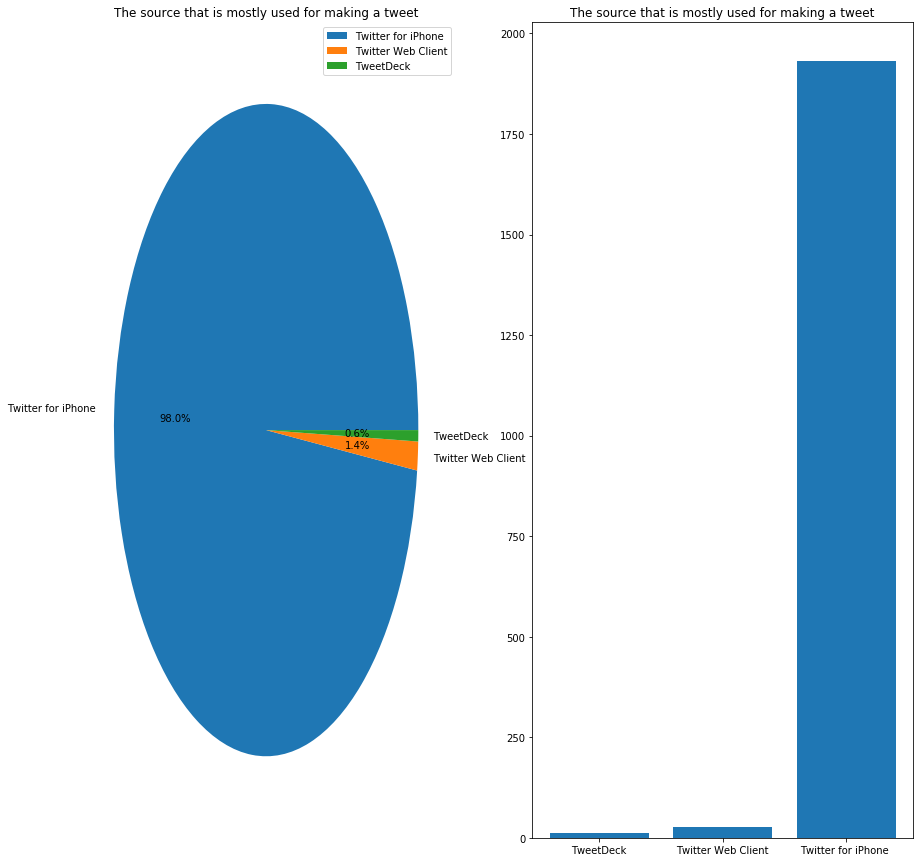

In [78]:
#plot the pie and bar chart of the distribution
figure, axis = plt.subplots(1, 2, figsize=(15,15))
axis[0].pie(labels=x_label,x=df.source.value_counts(),autopct='%0.1f%%');
axis[0].set_title('The source that is mostly used for making a tweet');
axis[0].legend(['Twitter for iPhone ','Twitter Web Client','TweetDeck']);

axis[1].bar(x=x_label,height=df.source.value_counts());
axis[1].set_title('The source that is mostly used for making a tweet');

We can deduce from the chart, that most of the tweets were done on iPhone (98%) using the Twitter app for iPhone, while the others  were done on browsers (1.4%) and TweetDeck (0.6%)

### Does the number of likes likely influence the number of followers WeRateDogs get

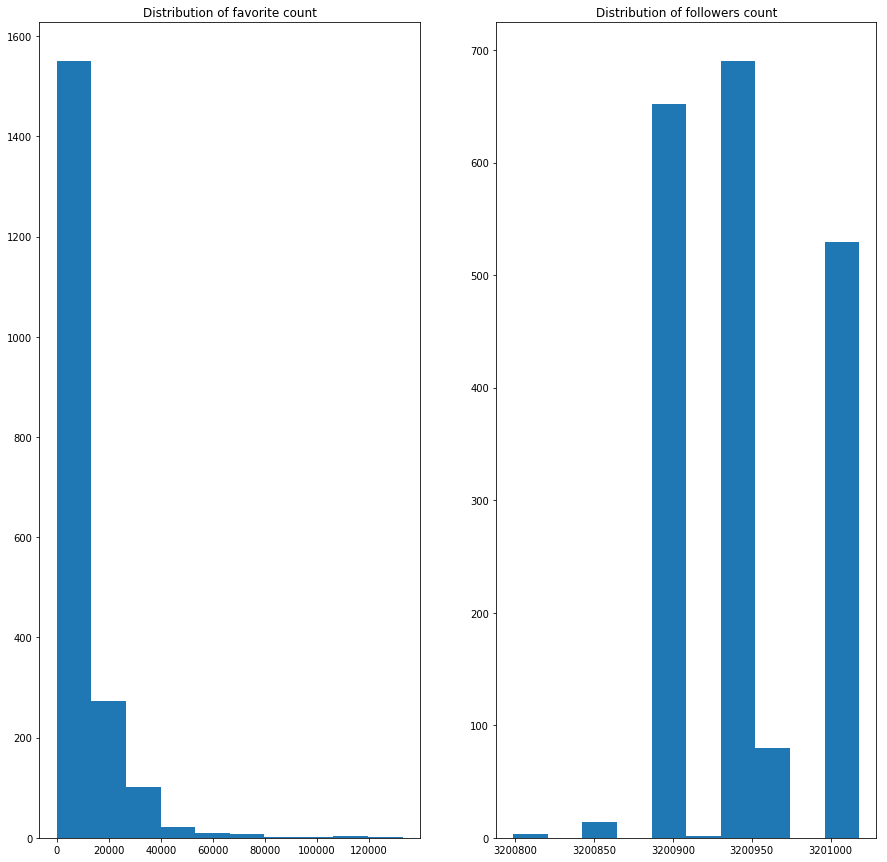

In [79]:
#plot a histogram to show the distribution of the variables
figure, axis = plt.subplots(1, 2, figsize=(15,15))
axis[0].hist(df.favorite_count);
axis[0].set_title('Distribution of favorite count');

axis[1].hist(df.followers_count);
axis[1].set_title('Distribution of followers count');

In [80]:
#check the correlation coefficient for the two variables
df.corr().loc['favorite_count','followers_count']

-0.54928435528899933

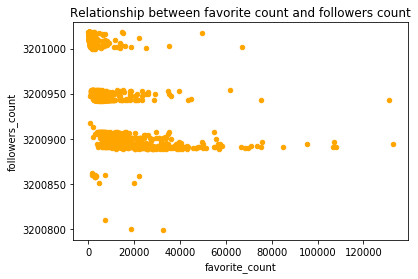

In [81]:
#plot the relationship using scatterplot
df.plot(x='favorite_count', y='followers_count', kind='scatter', title='Relationship between favorite count and followers count',c='orange');

As shown in the figure above, there is a moderate negative correlation (-0.5) between favorite count and followers count

### Does the number of re-tweets likely influence the number of likes that WeRateDogs tweets get

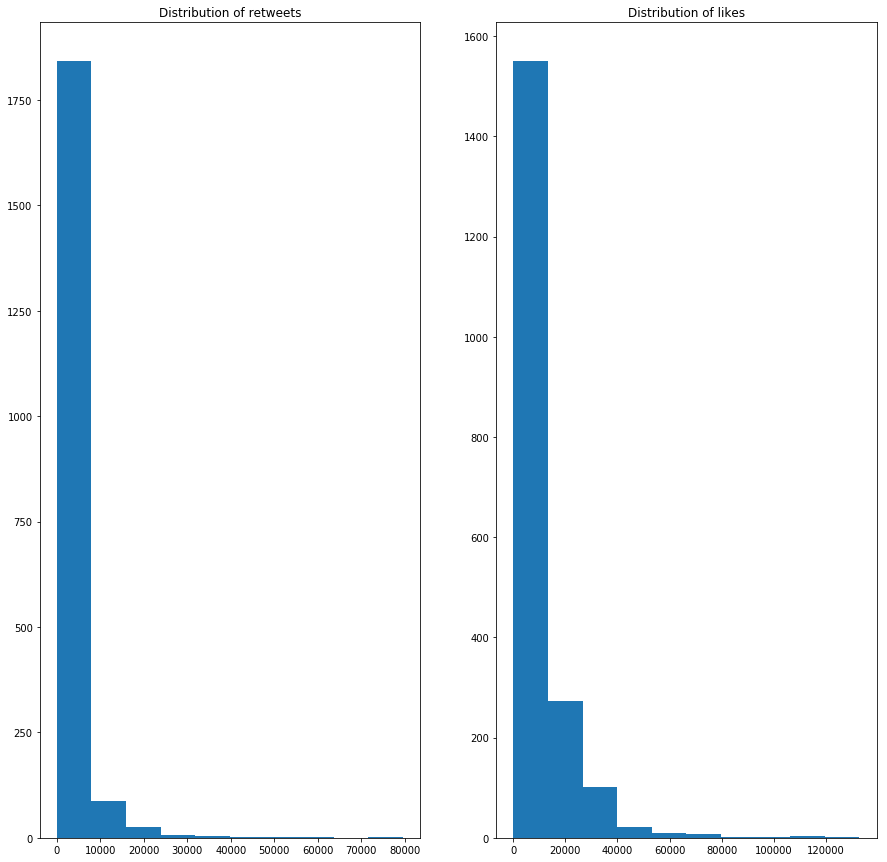

In [82]:
#plot a histogram to show the distribution of the variables
figure, axis = plt.subplots(1, 2, figsize=(15,15))
axis[0].hist(df.retweet_count);
axis[0].set_title('Distribution of retweets');

axis[1].hist(df.favorite_count);
axis[1].set_title('Distribution of likes');

In [83]:
#check the correlation coefficient for the two variables
df.corr().loc['retweet_count','favorite_count']

0.91301174009380126

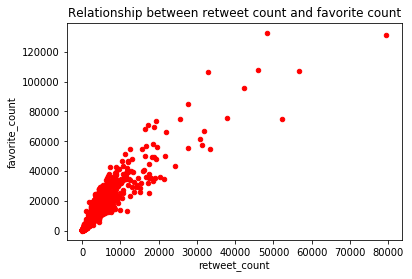

In [84]:
#plot the relationship using scatterplot
df.plot(x='retweet_count', y='favorite_count', kind='scatter', title='Relationship between retweet count and favorite count',c='red');

As shown above, there is a strong positive correlation (0.9) between retweet count and favorite count

### Conclusions

### The source that is mostly used for making a tweet by WeRateDogs
The highest source through which the tweets were made is Twitter iPhone app, followed by Twitter on the web and TweetDeck

### Does the number of likes likely influence the number of followers WeRateDogs get
The analysis shows that the number of likes will likely influence the number of followers negatively

### Does the number of re-tweets likely influence the number of likes that WeRateDogs tweets get
The analysis reveals that the number of re-tweets will likely influence the number of likes positively

### Limitation
* The analysis is based on an old dataset
* Premium Twitter developer account is needed to access more information on the tweets

### Additional Research
* More information on the different stages a dog can categorized according to WeRateDog is needed
* More insight on the rating system used by WeRateDog is needed